<a href="https://colab.research.google.com/github/aravindchakravarti/Deep_Learning_EVA_4/blob/master/S13_YOLO/13A_OpenCV/OpenCV_YoLo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np

In [0]:
import sys
sys.path.append('./gdrive/My Drive/yolo3weights/')

In [0]:
!cp './gdrive/My Drive/yolo3weights/yolov3.weights' './'
!cp './gdrive/My Drive/yolo3weights/Aravind.jpeg' './'

In [7]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (3920/3920), done.


In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "./darknet/cfg/yolov3.cfg")
classes = []
with open("./darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [9]:
# Loading image
img = cv2.imread("Aravind.jpeg")
#img = cv2.416(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

print(height, width, channels)

416 416 3


In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

<Figure size 432x288 with 0 Axes>

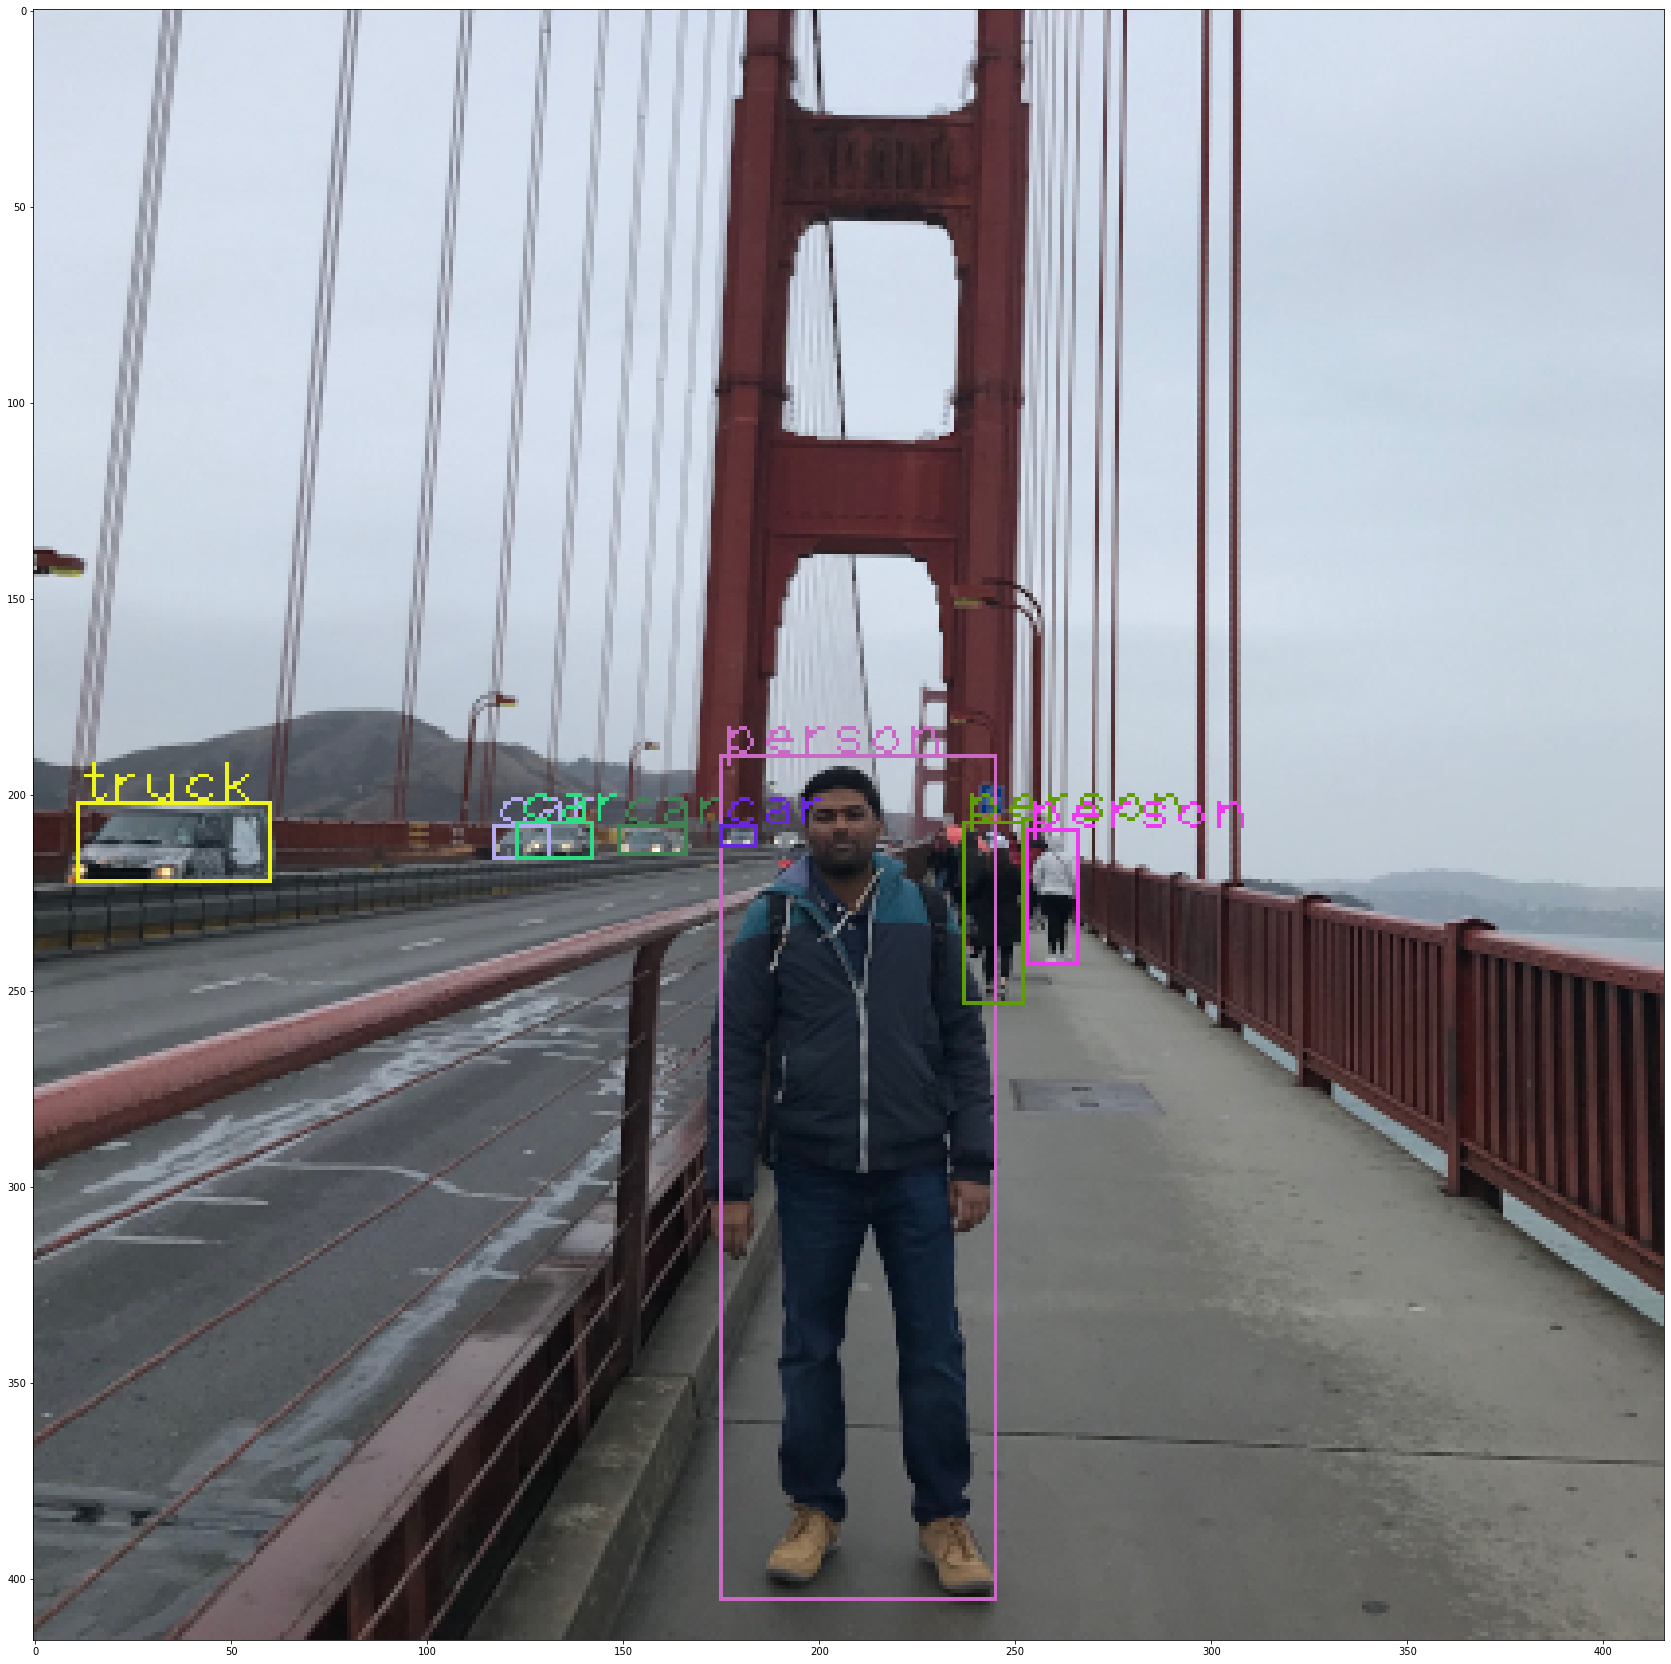

In [20]:
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.putText(img, label, (x, y), font, 1, color, 1)

b,g,r = cv2.split(img)       # get b,g,r
rgbimg = cv2.merge([r,g,b])     # switch it to rgb

plt.savefig('annotated_image.png')
plt.figure(figsize = (30,30))
plt.imshow(rgbimg)

#image = cv2.putText(image, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA) 